In [101]:
#imports
import tensorflow as ts
import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import time
import random

from numpy.random import seed
from random import randint
from keras.datasets import mnist
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.utils import to_categorical,np_utils

def done():
    print("DONE")
def nl():
    print("")
    
done()

DONE


In [123]:
#magic numbers
seed(42)
nr_classes=10
nr_neurons_in_layer=10
my_optimizer=Adam()
my_batch_size=128
pixels_ox=28
pixels_oy=28
my_epochs=10

#want_to_train=False

done()

DONE


path: f:\stuff\anaconda2\envs\tensorflow\lib\site-packages\keras\datasets\mnist.py

shape of training input: (60000, 28, 28)
shape of training output: (60000,)
shape of test input: (10000, 28, 28)
shape of training output: (10000,)

DONE


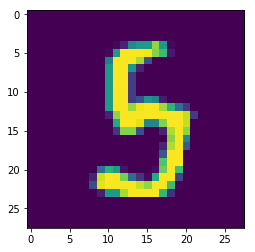

In [103]:
#loading the data set and veifying shape
print("path:",mnist.__file__)
nl()
(input_train,output_train),(input_test,output_test)=mnist.load_data()
print("shape of training input:",input_train.shape)
print("shape of training output:",output_train.shape)
print("shape of test input:",input_test.shape)
print("shape of training output:",output_test.shape)
nl()

pick_a_random_input=randint(0,len(input_train))
plt.imshow(input_train[pick_a_random_input])


done()

In [104]:
#RESHAPING

#difference between the two?

#MODEL BASED 
reshaped=28*28
input_train = np.reshape(input_train, (input_train.shape[0],reshaped))
input_test = np.reshape(input_test, (input_test.shape[0],reshaped))

#FUNCTIONAL
#input_train = np.reshape(input_train, (-1,pixels_ox, pixels_oy,1))
#input_test = np.reshape(input_test, (-1,pixels_ox, pixels_oy, 1))

#input_train = np.reshape(input_train, (-1,pixels_ox, pixels_oy))
#input_test = np.reshape(input_test, (-1,pixels_ox, pixels_oy))

print("reshaped input_train:",input_train.shape)
print("reshaped input_test:",input_test.shape)

reshaped input_train: (60000, 784)
reshaped input_test: (10000, 784)


In [105]:
#ENSURING FLOAT

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

done()

DONE


In [106]:
#NORMALIZING DATA
input_train=input_train/255
input_test=input_test/255
done()

DONE


In [107]:
#ONEHOT ENCODING
choose_random_output=randint(0,len(output_train)-1)
print("before onehot enconding:",output_train[choose_random_output])
output_train_encoded=to_categorical(output_train,nr_classes)
output_test_encoded=to_categorical(output_test,nr_classes)
print("after onehot encoding:",output_train_encoded[choose_random_output])
done()


before onehot enconding: 2
after onehot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
DONE


In [114]:
#DEFINING MODEL
def my_model(x):
    x=Dense(nr_neurons_in_layer)(x)
    x=Dense(nr_neurons_in_layer)(x)
    x=Dense(nr_classes, activation='softmax')(x)
    return x

done()

DONE


In [119]:
#FUNCTIONAL API

my_inputs=Input((reshaped,))
my_outputs=my_model(my_inputs)

model = Model(inputs=my_inputs,outputs=my_outputs)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [120]:
#COMPILATION
model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=['accuracy'])

done()

DONE


In [121]:
#callbacks?

class PlotLosses(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.logs = []
        self.losses = []
        self.test_losses = []
        
        self.plot = plt.figure()
        
    def on_epoch_end(self, epoch, logs={}):
        self.x.append(self.i)
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.test_losses.append(logs.get('val_loss'))
        
        plt.plot(self.x, self.losses, label='train')
        plt.plot(self.x, self.test_losses, label='test')
        plt.show()
        
        self.i += 1
losses_train = PlotLosses()
done()

DONE


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2520 - acc: 0.9303 - val_loss: 0.2740 - val_acc: 0.9228


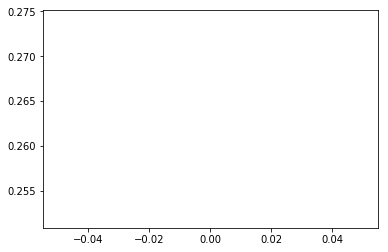

Epoch 2/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2503 - acc: 0.9301 - val_loss: 0.2740 - val_acc: 0.9235


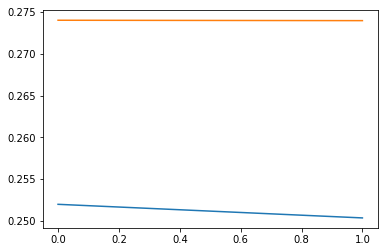

Epoch 3/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2497 - acc: 0.9301 - val_loss: 0.2710 - val_acc: 0.9257


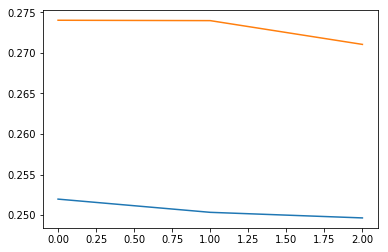

Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2473 - acc: 0.9310 - val_loss: 0.2746 - val_acc: 0.9238


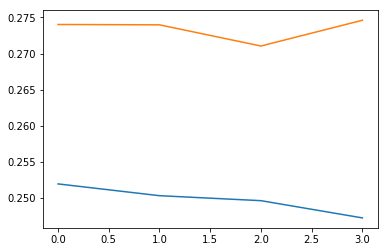

Epoch 5/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2469 - acc: 0.9321 - val_loss: 0.2684 - val_acc: 0.9255


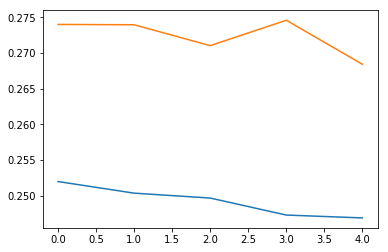

Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2459 - acc: 0.9322 - val_loss: 0.2777 - val_acc: 0.9224


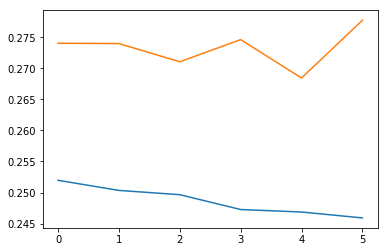

Epoch 7/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2450 - acc: 0.9320 - val_loss: 0.2719 - val_acc: 0.9245


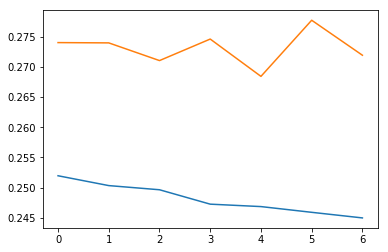

Epoch 8/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2436 - acc: 0.9328 - val_loss: 0.2722 - val_acc: 0.9236


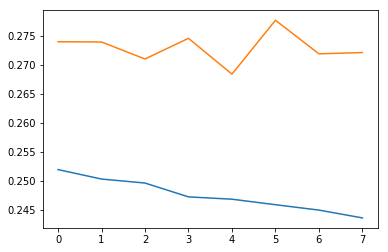

Epoch 9/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2425 - acc: 0.9326 - val_loss: 0.2751 - val_acc: 0.9246


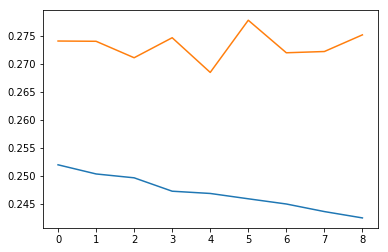

Epoch 10/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.2416 - acc: 0.9327 - val_loss: 0.2731 - val_acc: 0.9250


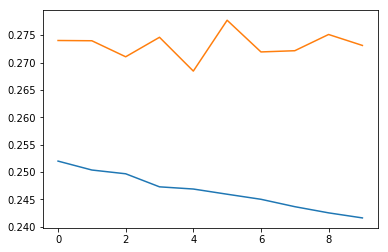

In [125]:
#FITTING 

model.fit(input_train, output_train_encoded,
             epochs=my_epochs,
             batch_size=my_batch_size,
             validation_data=(input_test, output_test_encoded),
             callbacks=[losses_train],
             verbose=1)

In [127]:
score = model.evaluate(input_test, output_test_encoded)
print("accuracy: ",score[1])

10000/10000 [==============================] - 0s 15us/step
accuracy:  0.925
